In [498]:
from pandas import Series
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf

import numpy as np 
import scipy as sc 
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd 

%matplotlib inline 

In [499]:
# Although concentrated in historically high-incidence areas, the geographic distribution is expanding into neighboring states. The trend of stable to decreasing case counts in many states with high incidence could be a result of multiple factors, including actual stabilization of disease incidence or artifact due to modifications in reporting practices employed by some states to curtail the resource burden associated with Lyme disease surveillance.
# In 2016, Massachusetts transitioned to a surveillance method that relies primarily on laboratory reports. This method does not currently align with the national surveillance case definition as set by the Council of State and Territorial Epidemiologists (CSTE). Therefore, information on most Lyme disease cases occurring in Massachusetts is not sent to CDC. Please contact the MA Department of Public HealthExternal for case numbers.
# this is very fishy, the two cases where they have decreased the incidence of Lyme used to have the highest rates. 

In [503]:
import matplotlib.pyplot as plt

def get_cmap(n, name='hsv'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)

In [504]:
leng = len(temp['Ctyname'].unique())
cmap = get_cmap(leng)

/Users/avani/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/avani/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/avani/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/s

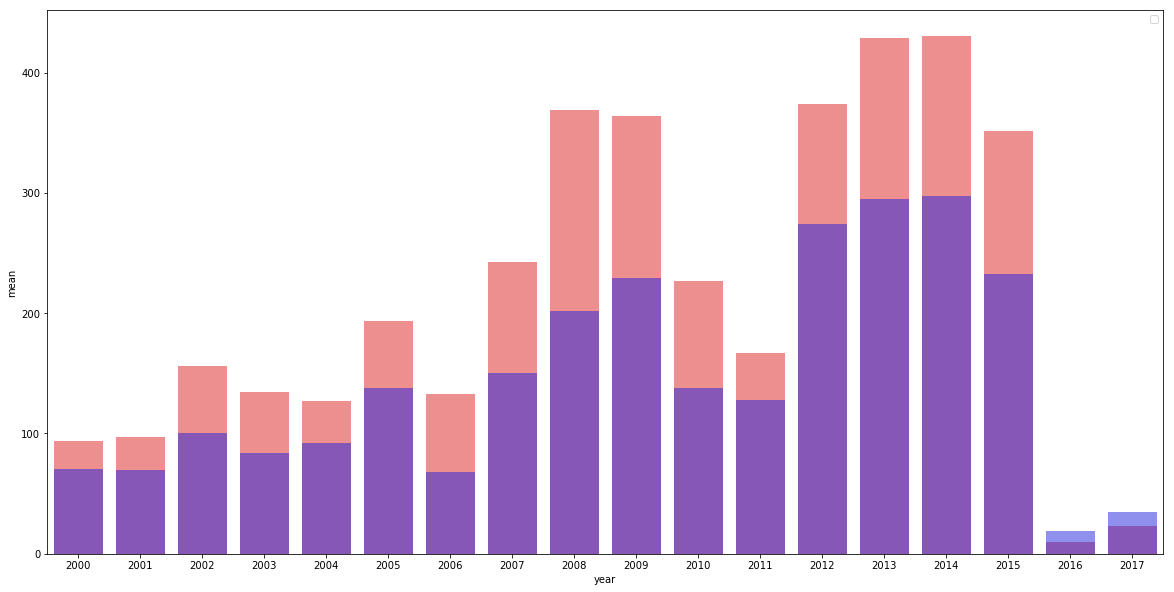

In [514]:
df = pd.read_csv('/Users/avani/Dropbox/Work/dataScience/Insight/PredictLyme/lyme_weather_cover.csv')
temp = df[df['Stname']=='Massachusetts']

x = temp[temp.Ctyname==ele]['year']
y = temp[temp.Ctyname==ele]['Cases']

temp['pcpn_1']= temp[['JAN_PCPN', 'FEB_PCPN', 'MAR_PCPN', 'APR_PCPN']].mean(axis=1)
temp['pcpn_2']= temp[['MAY_PCPN', 'JUN_PCPN', 'JUL_PCPN', 'AUG_PCPN']].mean(axis=1)
temp['pcpn_3']= temp[['SEP_PCPN', 'OCT_PCPN', 'NOV_PCPN', 'DEC_PCPN']].mean(axis=1)

temp['tmpc_1']= temp[['JAN_TMPC', 'FEB_TMPC', 'MAR_TMPC', 'APR_TMPC']].mean(axis=1)
temp['tmpc_2']= temp[['MAY_TMPC', 'JUN_TMPC', 'JUL_TMPC', 'AUG_TMPC']].mean(axis=1)
temp['tmpc_3']= temp[['SEP_TMPC', 'OCT_TMPC', 'NOV_TMPC', 'DEC_TMPC']].mean(axis=1)

temp['tmax_1']= temp[['JAN_TMAX', 'FEB_TMAX', 'MAR_TMAX', 'APR_TMAX']].mean(axis=1)
temp['tmax_2']= temp[['MAY_TMAX', 'JUN_TMAX', 'JUL_TMAX', 'AUG_TMAX']].mean(axis=1)
temp['tmax_3']= temp[['SEP_TMAX', 'OCT_TMAX', 'NOV_TMAX', 'DEC_TMAX']].mean(axis=1)

temp['tmin_1']= temp[['JAN_TMIN', 'FEB_TMIN', 'MAR_TMIN', 'APR_TMIN']].mean(axis=1)
temp['tmin_2']= temp[['MAY_TMIN', 'JUN_TMIN', 'JUL_TMIN', 'AUG_TMIN']].mean(axis=1)
temp['tmin_3']= temp[['SEP_TMIN', 'OCT_TMIN', 'NOV_TMIN', 'DEC_TMIN']].mean(axis=1)

new_temp = temp.groupby("Ctyname", as_index=False).tmpc_2.agg({"tmpc_2": lambda x: list(x), "mean": "mean"})
med = np.median(new_temp['mean'])

warmc = new_temp[new_temp['mean']>med]['Ctyname']
coolc = new_temp[new_temp['mean']<=med]['Ctyname']

warmc_time = temp.loc[temp['Ctyname'].isin(warmc)]
coolc_time = temp.loc[temp['Ctyname'].isin(coolc)]

x1_mean = warmc_time.groupby("year", as_index=False).Cases.agg({"tmpc_2": lambda x: list(x), "mean": "mean"})
x1_sum = warmc_time.groupby("year", as_index=False).Cases.agg({"tmpc_2": lambda x: list(x), "sum": "sum"})
x1_rms = warmc_time.groupby("year", as_index=False).Cases.agg({"tmpc_2": lambda x: list(x), "std": "std"})

x2_mean = coolc_time.groupby("year", as_index=False).Cases.agg({"tmpc_2": lambda x: list(x), "mean": "mean"})
x2_sum = coolc_time.groupby("year", as_index=False).Cases.agg({"tmpc_2": lambda x: list(x), "sum": "sum"})
x2_rms = coolc_time.groupby("year", as_index=False).Cases.agg({"tmpc_2": lambda x: list(x), "std": "std"})

plt.figure(figsize=(20,10))
sns.barplot(x2['year']+1.0, x2['mean'], color='red', alpha=0.5)
sns.barplot(x1['year'], x1['mean'], color='blue', alpha=0.5)
plt.legend('Warm counties', 'Cool counties')


/Users/avani/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/avani/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/avani/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/s

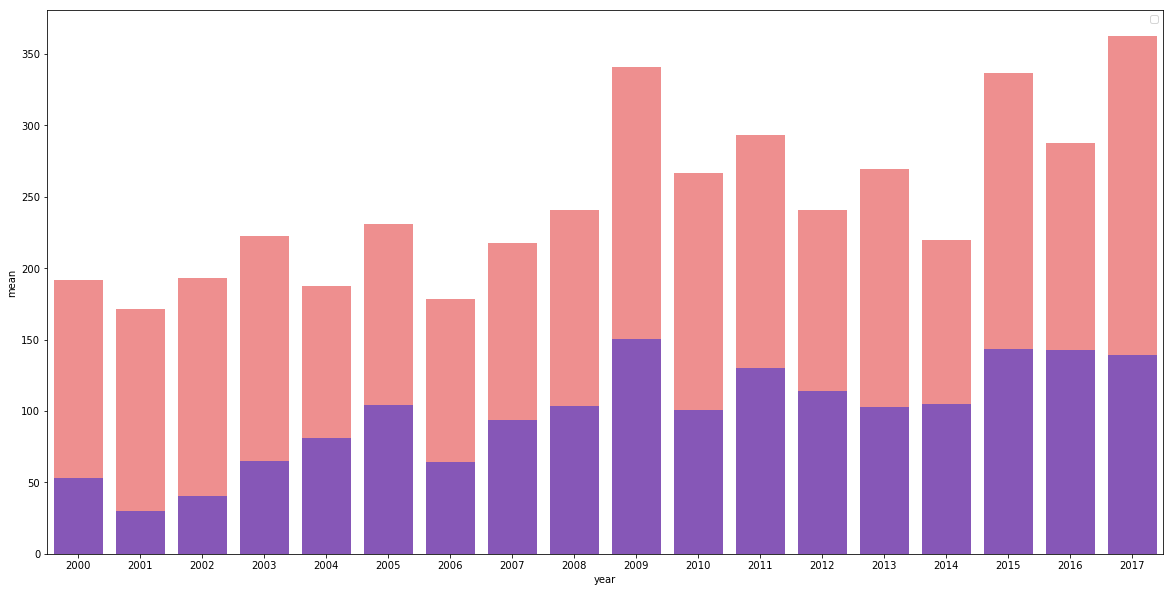

In [513]:
df = pd.read_csv('/Users/avani/Dropbox/Work/dataScience/Insight/PredictLyme/lyme_weather_cover.csv')
temp = df[df['Stname']=='New Jersey']

x = temp[temp.Ctyname==ele]['year']
y = temp[temp.Ctyname==ele]['Cases']

temp['pcpn_1']= temp[['JAN_PCPN', 'FEB_PCPN', 'MAR_PCPN', 'APR_PCPN']].mean(axis=1)
temp['pcpn_2']= temp[['MAY_PCPN', 'JUN_PCPN', 'JUL_PCPN', 'AUG_PCPN']].mean(axis=1)
temp['pcpn_3']= temp[['SEP_PCPN', 'OCT_PCPN', 'NOV_PCPN', 'DEC_PCPN']].mean(axis=1)

temp['tmpc_1']= temp[['JAN_TMPC', 'FEB_TMPC', 'MAR_TMPC', 'APR_TMPC']].mean(axis=1)
temp['tmpc_2']= temp[['MAY_TMPC', 'JUN_TMPC', 'JUL_TMPC', 'AUG_TMPC']].mean(axis=1)
temp['tmpc_3']= temp[['SEP_TMPC', 'OCT_TMPC', 'NOV_TMPC', 'DEC_TMPC']].mean(axis=1)

temp['tmax_1']= temp[['JAN_TMAX', 'FEB_TMAX', 'MAR_TMAX', 'APR_TMAX']].mean(axis=1)
temp['tmax_2']= temp[['MAY_TMAX', 'JUN_TMAX', 'JUL_TMAX', 'AUG_TMAX']].mean(axis=1)
temp['tmax_3']= temp[['SEP_TMAX', 'OCT_TMAX', 'NOV_TMAX', 'DEC_TMAX']].mean(axis=1)

temp['tmin_1']= temp[['JAN_TMIN', 'FEB_TMIN', 'MAR_TMIN', 'APR_TMIN']].mean(axis=1)
temp['tmin_2']= temp[['MAY_TMIN', 'JUN_TMIN', 'JUL_TMIN', 'AUG_TMIN']].mean(axis=1)
temp['tmin_3']= temp[['SEP_TMIN', 'OCT_TMIN', 'NOV_TMIN', 'DEC_TMIN']].mean(axis=1)

new_temp = temp.groupby("Ctyname", as_index=False).tmpc_2.agg({"tmpc_2": lambda x: list(x), "mean": "mean"})
med = np.median(new_temp['mean'])

warmc = new_temp[new_temp['mean']>med]['Ctyname']
coolc = new_temp[new_temp['mean']<=med]['Ctyname']

warmc_time = temp.loc[temp['Ctyname'].isin(warmc)]
coolc_time = temp.loc[temp['Ctyname'].isin(coolc)]

x1_mean = warmc_time.groupby("year", as_index=False).Cases.agg({"tmpc_2": lambda x: list(x), "mean": "mean"})
x1_sum = warmc_time.groupby("year", as_index=False).Cases.agg({"tmpc_2": lambda x: list(x), "sum": "sum"})
x1_rms = warmc_time.groupby("year", as_index=False).Cases.agg({"tmpc_2": lambda x: list(x), "std": "std"})

x2_mean = coolc_time.groupby("year", as_index=False).Cases.agg({"tmpc_2": lambda x: list(x), "mean": "mean"})
x2_sum = coolc_time.groupby("year", as_index=False).Cases.agg({"tmpc_2": lambda x: list(x), "sum": "sum"})
x2_rms = coolc_time.groupby("year", as_index=False).Cases.agg({"tmpc_2": lambda x: list(x), "std": "std"})

plt.figure(figsize=(20,10))
sns.barplot(x2_mean['year']+1.0, x2_mean['mean'], color='red', alpha=0.5)
sns.barplot(x1_mean['year'], x1_mean['mean'], color='blue', alpha=0.5)
plt.legend('Warm counties', 'Cool counties')


In [483]:
import plotly.plotly as py
import plotly.graph_objs as go

trace1 = go.Bar(
    x=x1['year'],
    y=x1_sum['sum'],
    name='Cool states (Tmed < 69 F)',
    marker=dict(
        color='rgb(104,104,284)'))
    
trace2 = go.Bar(
    x=x2['year'],
    y=x2_sum['sum'],
    name='Warm states (Tmed > 69 F)',
    marker=dict(
        color='rgb(189,20,18)'
    ))

data = [trace1, trace2]
layout = go.Layout(
    barmode='group'
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='grouped-bar')

/Users/avani/anaconda3/lib/python3.6/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



/Users/avani/anaconda3/lib/python3.6/site-packages/matplotlib/legend.py:634: UserWarning:

Legend does not support 'W' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist

/Users/avani/anaconda3/lib/python3.6/site-packages/matplotlib/legend.py:634: UserWarning:

Legend does not support 'a' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist

/Users/avani/anaconda3/lib/python3.6/site-packages/matplotlib/legend.py:634: UserWarning:

Legend does not support 'r' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist

/Users/avani/anaconda3/lib/python3.6/site-packages/matplotlib/legend.py:634: UserWarning:

Legend does not support 'm' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist

/Users/avani/anaconda3/lib/python3.6/site-packages/m

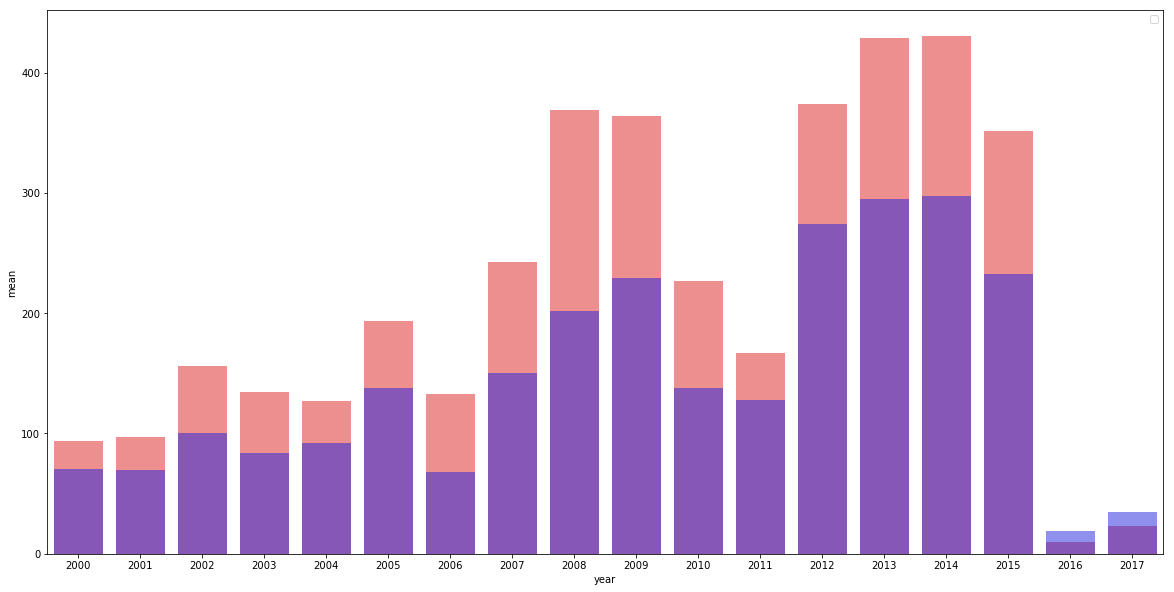

In [510]:
plt.figure(figsize=(20,10))
sns.barplot(x2['year']+1.0, x2['mean'], color='red', alpha=0.5)
sns.barplot(x1['year'], x1['mean'], color='blue', alpha=0.5)
plt.legend('Warm counties', 'Cool counties')

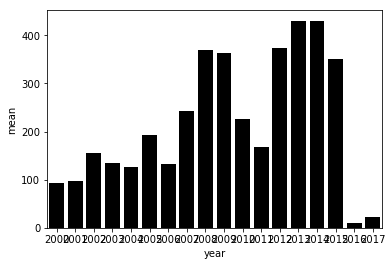

In [450]:
sns.barplot(x2['year'], x2['mean'], color='black')

<Container object of 3 artists>

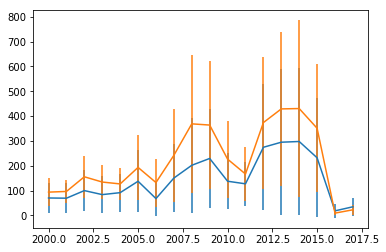

In [445]:
plt.errorbar(x1['year'], x1['mean'], yerr=x1_rms['std'])
plt.errorbar(x2['year'], x2['mean'], yerr=x2_rms['std'])

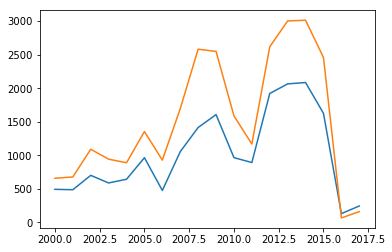

In [438]:
plt.plot(x1['year'], x1['sum'])
plt.plot(x2['year'], x2['sum'])

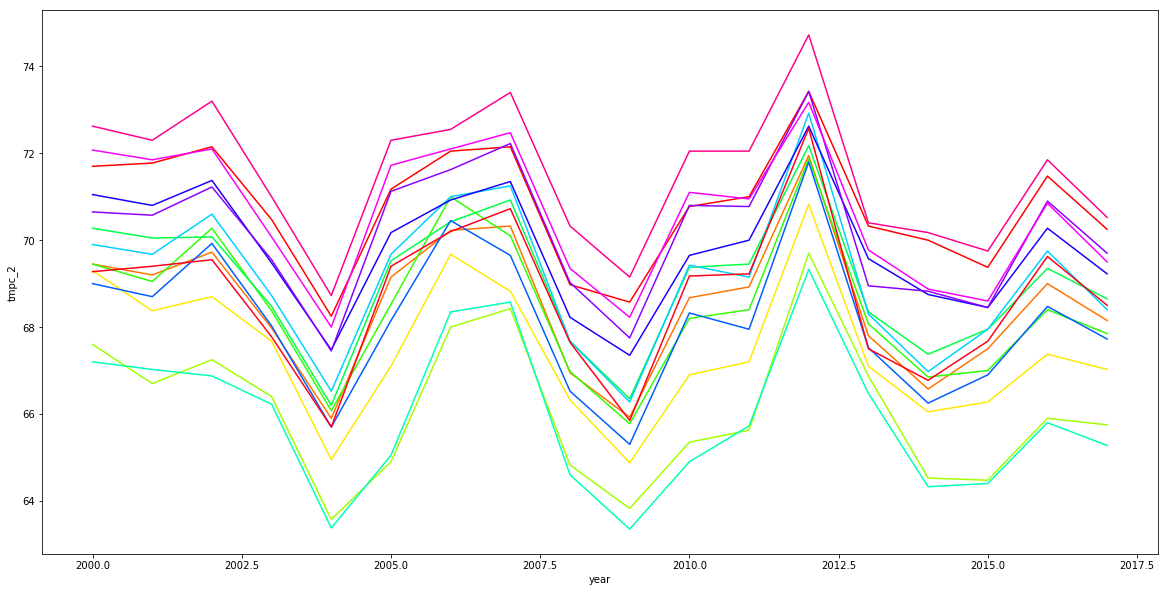

In [394]:
plt.figure(figsize=(20,10))
for i in range(leng):
    ele = temp['Ctyname'].unique()[i]
    sns.lineplot(temp[temp.Ctyname==ele]['year'], temp[temp.Ctyname==ele]['tmpc_2'], color=cmap(i))
    plt.axhline()

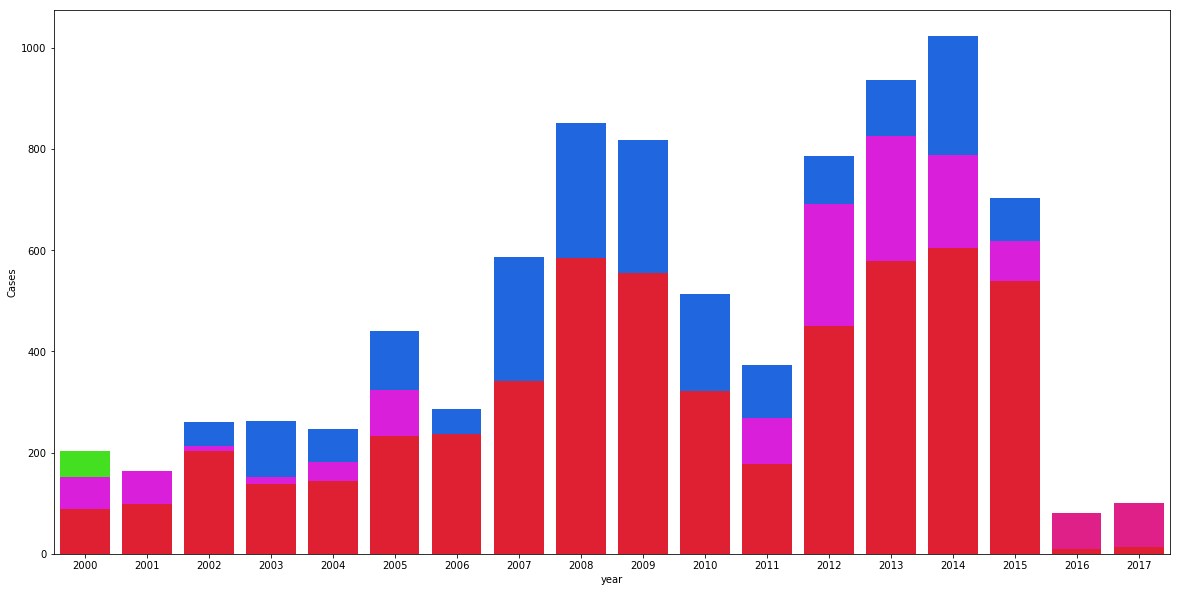

In [365]:
plt.figure(figsize=(20,10))
for i in range(leng):
    ele = temp['Ctyname'].unique()[i]
    sns.barplot(temp[temp.Ctyname==ele]['year'], temp[temp.Ctyname==ele]['Cases'], color=cmap(i), label='ele')

In [ ]:
Counties with a high mean temperature -- show their evolution with time
Counties with a low mean temperature -- show their evolution 


In [332]:
# the rate is increasing faster in some than in others - what is driving this difference?

/Users/avani/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/avani/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/Users/avani/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/s

In [495]:
state_wise = df[df['year']==2015].groupby("Stname", as_index=False).Cases.agg({"Cases": lambda x: list(x), "sum": "sum"}).sort_values(by='sum')

In [496]:
import plotly.plotly as py
import plotly.graph_objs as go

data = [go.Bar(
    x=state_wise['Stname'],
    y=state_wise['sum'],
    name='Lyme per state',
    marker=dict(
        color='rgb(49,130,189)'
    )
)]

layout = go.Layout(
    xaxis=dict(tickangle=-45),
    barmode='group',
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='angled-text-bar')

/Users/avani/anaconda3/lib/python3.6/site-packages/IPython/core/display.py:689: UserWarning:

Consider using IPython.display.IFrame instead



In [361]:
ser1 = temp['Cases']
ser2 = temp['tmpc_2']

In [366]:
temp2 = temp[['Cases','year', 'pcpn_1',
       'pcpn_2', 'pcpn_3', 'tmpc_1', 'tmpc_2', 'tmpc_3', 'tmax_1', 'tmax_2',
       'tmax_3', 'tmin_1', 'tmin_2', 'tmin_3']]

In [369]:
crosscorr(temp2['Cases'],temp2['Cases'],lag=50)

0.00047576993028671937

In [367]:
corr = temp2.corr()
corr.style.background_gradient(cmap='viridis')

,Cases,year,pcpn_1,pcpn_2,pcpn_3,tmpc_1,tmpc_2,tmpc_3,tmax_1,tmax_2,tmax_3,tmin_1,tmin_2,tmin_3
Cases,1,0.17694,-0.162755,0.152241,0.0400485,-0.233846,-0.0663751,-0.151066,-0.150129,-0.106102,-0.17583,-0.296039,-0.0205933,-0.0922316
year,0.17694,1,0.0592531,0.322637,0.0900611,0.0332648,-0.141936,0.179931,0.0312014,-0.210764,0.189585,0.0306778,-0.0536996,0.128645
pcpn_1,-0.162755,0.0592531,1,0.21218,0.204521,0.0893065,0.39359,0.388612,-0.167883,0.124176,0.312889,0.400724,0.481125,0.36339
pcpn_2,0.152241,0.322637,0.21218,1,0.440451,-0.402305,0.0329047,0.260402,-0.514127,-0.459658,-0.000158091,-0.184234,0.377421,0.433521
pcpn_3,0.0400485,0.0900611,0.204521,0.440451,1,-0.133422,0.111541,0.190285,-0.217938,-0.254793,-0.193326,-0.00129688,0.344017,0.491646
tmpc_1,-0.233846,0.0332648,0.0893065,-0.402305,-0.133422,1,0.399461,0.180745,0.936792,0.601617,0.254191,0.894893,0.147218,0.0717322
tmpc_2,-0.0663751,-0.141936,0.39359,0.0329047,0.111541,0.399461,1,0.350393,0.196255,0.775433,0.214429,0.584018,0.891832,0.389279
tmpc_3,-0.151066,0.179931,0.388612,0.260402,0.190285,0.180745,0.350393,1,0.0310516,0.0755265,0.859818,0.339959,0.453048,0.88656
tmax_1,-0.150129,0.0312014,-0.167883,-0.514127,-0.217938,0.936792,0.196255,0.0310516,1,0.531377,0.170343,0.682245,-0.0966018,-0.1016
tmax_2,-0.106102,-0.210764,0.124176,-0.459658,-0.254793,0.601617,0.775433,0.0755265,0.531377,1,0.220607,0.579232,0.406018,-0.0736056


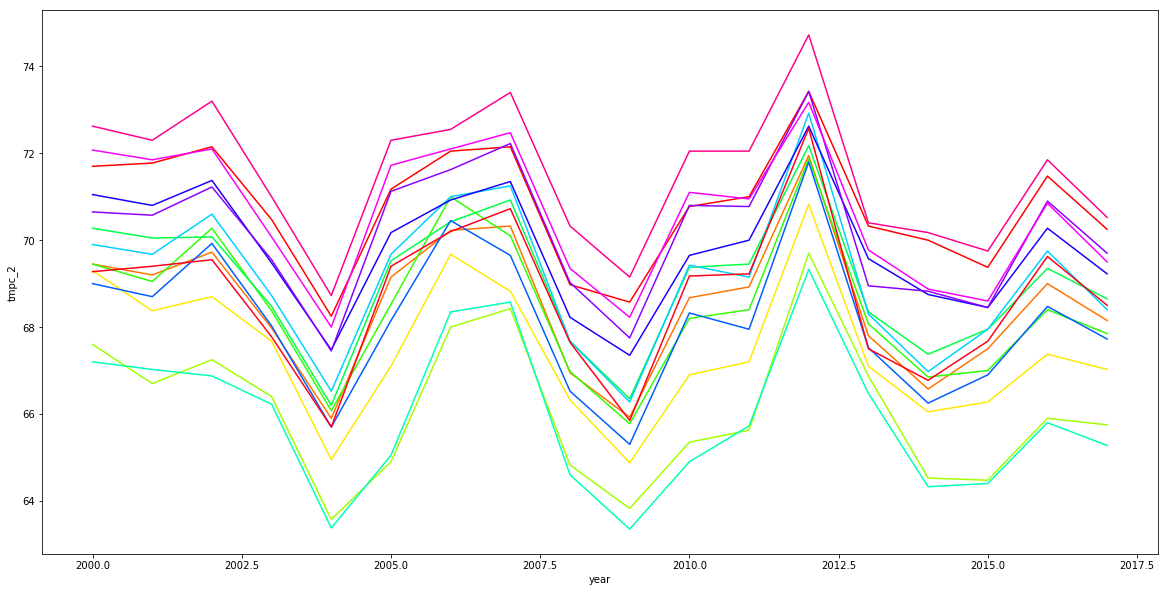

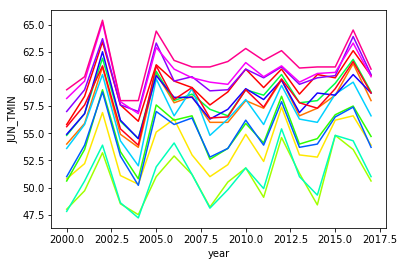

In [281]:
for i in range(leng):
    ele = temp['Ctyname'].unique()[i]
    sns.lineplot(temp[temp.Ctyname==ele]['year'], temp[temp.Ctyname==ele]['JUN_TMIN'], color=cmap(i))

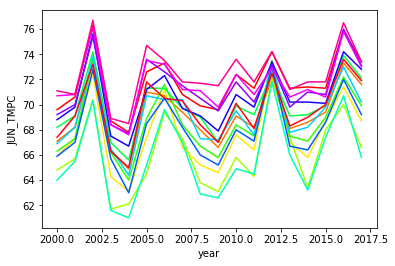

In [278]:
for i in range(leng):
    ele = temp['Ctyname'].unique()[i]
    sns.lineplot(temp[temp.Ctyname==ele]['year'], temp[temp.Ctyname==ele]['JUN_TMPC'], color=cmap(i))
    

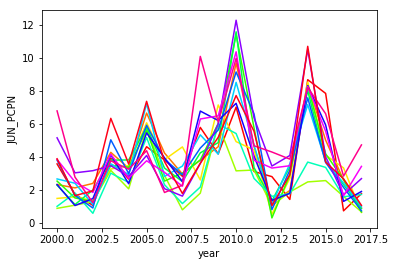

In [290]:
for i in range(leng):
    ele = temp['Ctyname'].unique()[i]
    sns.lineplot(temp[temp.Ctyname==ele]['year'], temp[temp.Ctyname==ele]['JUN_PCPN'], color=cmap(i))

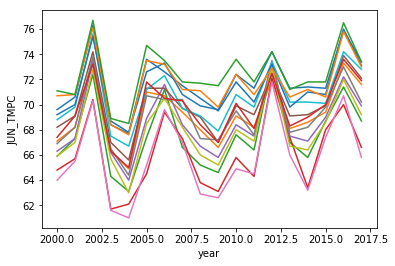

In [266]:
for ele in temp['Ctyname'].unique():
    sns.lineplot(temp[temp.Ctyname==ele]['year'], temp[temp.Ctyname==ele]['JUN_TMPC'])

In [259]:
# there is a two year cycle. 

In [ ]:
basically, if the temps/prcps are very related to the year, then the same information is conveyed. 
need to do EDA and play with data

In [ ]:
make a correlation plot of all the parameters 
use previous years and previous previous years data as information
time series for each county with additional features.  
remove the anomalous ones 

In [ ]:
step1: do an individual regression for each county using the year, temps, prcp, as data.     

In [202]:
df.columns

Index(['Unnamed: 0', 'Ctyname', 'Stname', 'STCODE', 'CTYCODE', 'Cases',
       'CENSUSAREA', 'geometry', 'long_lat', 'deer_density', 'ST', 'DIV',
       'EL_x', 'YR', 'JAN_PCPN', 'FEB_PCPN', 'MAR_PCPN', 'APR_PCPN',
       'MAY_PCPN', 'JUN_PCPN', 'JUL_PCPN', 'AUG_PCPN', 'SEP_PCPN', 'OCT_PCPN',
       'NOV_PCPN', 'DEC_PCPN', 'EL_y', 'JAN_TMPC', 'FEB_TMPC', 'MAR_TMPC',
       'APR_TMPC', 'MAY_TMPC', 'JUN_TMPC', 'JUL_TMPC', 'AUG_TMPC', 'SEP_TMPC',
       'OCT_TMPC', 'NOV_TMPC', 'DEC_TMPC', 'JAN_TMIN', 'FEB_TMIN', 'MAR_TMIN',
       'APR_TMIN', 'MAY_TMIN', 'JUN_TMIN', 'JUL_TMIN', 'AUG_TMIN', 'SEP_TMIN',
       'OCT_TMIN', 'NOV_TMIN', 'DEC_TMIN', 'JAN_TMAX', 'FEB_TMAX', 'MAR_TMAX',
       'APR_TMAX', 'MAY_TMAX', 'JUN_TMAX', 'JUL_TMAX', 'AUG_TMAX', 'SEP_TMAX',
       'OCT_TMAX', 'NOV_TMAX', 'DEC_TMAX', 'ST_new', 'year'],
      dtype='object')

In [ ]:
y = 'Cases'

In [222]:
df['long_lat'][0]

'(-86.64119616803882, 32.53615292143654)'

In [215]:
       'CENSUSAREA', 'geometry', 'long_lat', 'deer_density', 'ST', 'DIV',
       'EL_x', 'YR', 'JAN_PCPN', 'FEB_PCPN', 'MAR_PCPN', 'APR_PCPN',
       'MAY_PCPN', 'JUN_PCPN', 'JUL_PCPN', 'AUG_PCPN', 'SEP_PCPN', 'OCT_PCPN',
       'NOV_PCPN', 'DEC_PCPN', 'EL_y', 'JAN_TMPC', 'FEB_TMPC', 'MAR_TMPC',
       'APR_TMPC', 'MAY_TMPC', 'JUN_TMPC', 'JUL_TMPC', 'AUG_TMPC', 'SEP_TMPC',
       'OCT_TMPC', 'NOV_TMPC', 'DEC_TMPC', 'JAN_TMIN', 'FEB_TMIN', 'MAR_TMIN',
       'APR_TMIN', 'MAY_TMIN', 'JUN_TMIN', 'JUL_TMIN', 'AUG_TMIN', 'SEP_TMIN',
       'OCT_TMIN', 'NOV_TMIN', 'DEC_TMIN', 'JAN_TMAX', 'FEB_TMAX', 'MAR_TMAX',
       'APR_TMAX', 'MAY_TMAX', 'JUN_TMAX', 'JUL_TMAX', 'AUG_TMAX', 'SEP_TMAX',
       'OCT_TMAX', 'NOV_TMAX', 'DEC_TMAX', 'ST_new', 'year'],
      dtype='object')

IndentationError: unexpected indent (<ipython-input-215-47c005fbfbe6>, line 2)

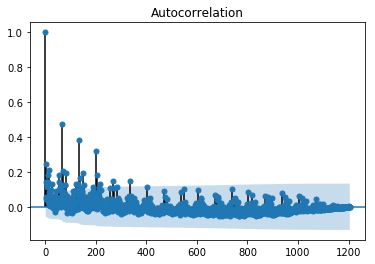

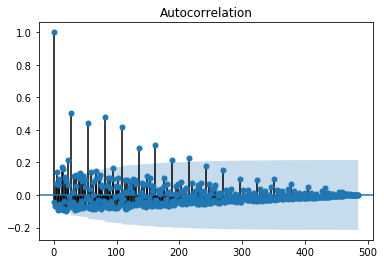

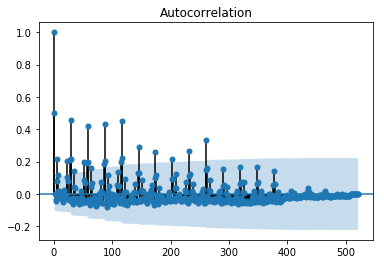

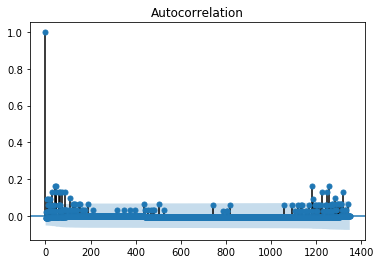

In [194]:
for state in df['Stname'].unique()[0:4]:
    series = df[df['Stname']==state]['Cases']
    plot_acf(series)

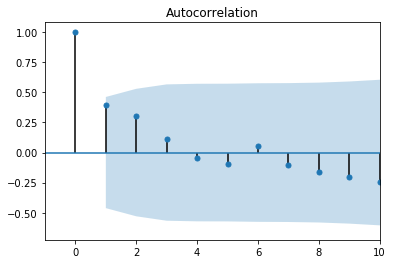

In [177]:
series = df[df['Ctyname'].str.contains('Tompkins')]['Cases']
plot_acf(series)
plt.xlim(-1,10)
plt.show()

(2000, 2015.5)

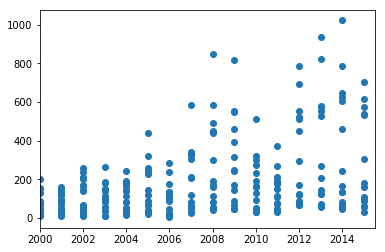

In [151]:
plt.scatter(df[df['Stname'].str.contains('Massa')]['year'],df[df['Stname'].str.contains('Massa')]['Cases'])
plt.xlim(2000,2015.5)

In [152]:
df.columns

Index(['Unnamed: 0', 'Ctyname', 'Stname', 'STCODE', 'CTYCODE', 'Cases',
       'CENSUSAREA', 'geometry', 'long_lat', 'deer_density', 'ST', 'DIV',
       'EL_x', 'YR', 'JAN_PCPN', 'FEB_PCPN', 'MAR_PCPN', 'APR_PCPN',
       'MAY_PCPN', 'JUN_PCPN', 'JUL_PCPN', 'AUG_PCPN', 'SEP_PCPN', 'OCT_PCPN',
       'NOV_PCPN', 'DEC_PCPN', 'EL_y', 'JAN_TMPC', 'FEB_TMPC', 'MAR_TMPC',
       'APR_TMPC', 'MAY_TMPC', 'JUN_TMPC', 'JUL_TMPC', 'AUG_TMPC', 'SEP_TMPC',
       'OCT_TMPC', 'NOV_TMPC', 'DEC_TMPC', 'JAN_TMIN', 'FEB_TMIN', 'MAR_TMIN',
       'APR_TMIN', 'MAY_TMIN', 'JUN_TMIN', 'JUL_TMIN', 'AUG_TMIN', 'SEP_TMIN',
       'OCT_TMIN', 'NOV_TMIN', 'DEC_TMIN', 'JAN_TMAX', 'FEB_TMAX', 'MAR_TMAX',
       'APR_TMAX', 'MAY_TMAX', 'JUN_TMAX', 'JUL_TMAX', 'AUG_TMAX', 'SEP_TMAX',
       'OCT_TMAX', 'NOV_TMAX', 'DEC_TMAX', 'ST_new', 'year'],
      dtype='object')

In [153]:
df_temp = df[df['Stname'].str.contains('Massa')]

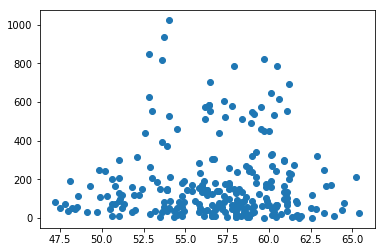

In [155]:
plt.scatter(df_temp['JUN_TMIN'],df_temp['Cases'])

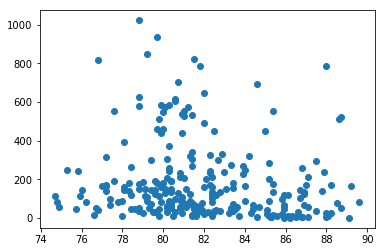

In [156]:
plt.scatter(df_temp['JUN_TMAX'],df_temp['Cases'])

In [ ]:
sns.lineplot(x='year', y='sum',)

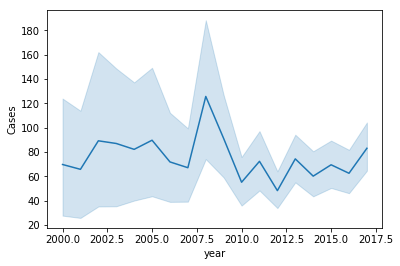

In [443]:
ax = sns.lineplot(x="year", y="Cases",
                  data=df[df['Stname'].str.contains('York')])

In [225]:
temp1 = df[df['Ctyname'].str.contains('Columbia County')]

In [226]:
temp2 = temp1[temp1['Stname']=='New York']

In [230]:
x = temp2['year']
y = temp2['Cases']

In [239]:
y

1847     595
4998     647
8149     999
11300    904
14451    404
17602    362
20753    375
23904    318
27055    584
30206    356
33357    220
36508    238
39659    183
42810    216
45961    185
49112    238
52263    202
55414    237
Name: Cases, dtype: int64

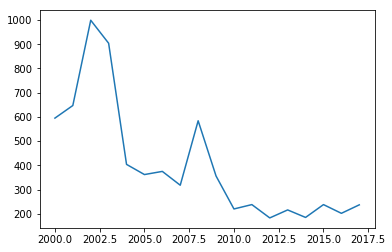

In [231]:
plt.plot(x,y)

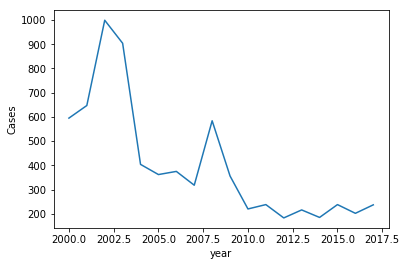

In [229]:
ax = sns.lineplot(x="year", y="Cases",
                  data=temp2)

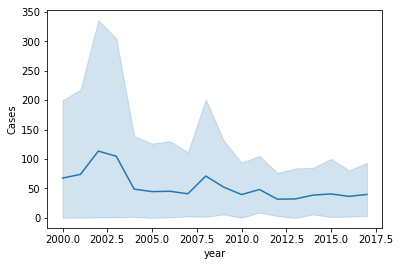

In [123]:
ax = sns.lineplot(x="year", y="Cases",
                  data=df[df['Ctyname'].str.contains('Columbia')])

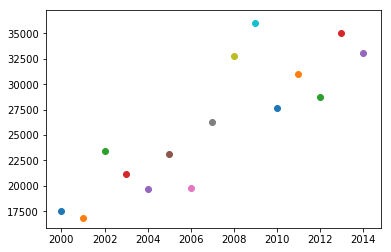

In [124]:
plt.figure() 
for year in range(2000,2015): 
    plt.scatter(year, sum(df[df['year']==year]['Cases']))

In [ ]:
plt.figure() 
for year in range(2000,2015): 
    plt.scatter(, sum(df[df['year']==year]['Cases']))

In [ ]:
plt.figure() 
for year in range(2000,2015): 
    plt.scatter(year, sum(df[df['year']==year]['Cases']))

In [ ]:
df_num_corr = df_num.corr()['cases'][:-1] # -1 because the latest row is SalePrice
golden_features_list = df_num_corr[abs(df_num_corr) > 0.5].sort_values(ascending=False)
print("There is {} strongly correlated values with SalePrice:\n{}".format(len(golden_features_list), golden_features_list))

In [ ]:
## remove outliers 

In [ ]:
## 

the distribution of lyme cases over the years in different counties -- histogram 
cases_county[] vs year []
cases_county[] vs mean temp + p[]
